# CS155 Project 3 - Shakespearean Sonnets: HMMs

**Author:** Liting Xiao

**Description:** this notebook trains HMMs to write parody poems of Shakespearean sonnets by training on a) all 154 Shakespearean sonnets in Section 2; b) both Shakespear's 154 poems and Edmund Spenser's Amoretti in Section 3.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

from HMM import unsupervised_HMM, HiddenMarkovModel
from HMM_helper import (
    states_to_wordclouds,
    sample_sentence,
    visualize_sparsities
)

### 1. Load Pre-processed Data

In [2]:
# basic datasets pre-processed from shakespeare.txt
basic_processed_seqs_vec = pickle.load(open("processed_data/basic_processed_seqs_vec.p", "rb"))
basic_word2vec = pickle.load(open("processed_data/basic_word2vec.p", "rb"))
basic_vec2word = pickle.load(open("processed_data/basic_vec2word.p", "rb"))

wordperline_prob = pickle.load(open("processed_data/wordperline_prob.p", "rb"))

In [3]:
# advanced datasets pre-processed from shakespeare.txt and spenser.txt
adv_processed_seqs_vec = pickle.load(open("processed_data/adv_processed_seqs_vec.p", "rb"))
adv_inv_processed_seqs_vec = pickle.load(open("processed_data/adv_inv_processed_seqs_vec.p", "rb"))
adv_word2vec = pickle.load(open("processed_data/adv_word2vec.p", "rb"))
adv_vec2word = pickle.load(open("processed_data/adv_vec2word.p", "rb"))

# syllable counts, rhymes
word2syllable = pickle.load(open("processed_data/word2syllable.p", "rb"))
rhymes = pickle.load(open("processed_data/rhymes.p", "rb"))

### 2. Unsupervised Learning - Hidden Markove Model (Naive)

Train HMMs with {4, 8, 16, 32} hidden layers and generate sample sentences for each.

In [4]:
def train_or_load_hmm(train_vec, n_hidden, tag, load_hmm=False, n_iter=100):
    # load model
    if load_hmm:
        hmm_A = pickle.load(open("processed_data/{}_hmm{}_A.p".format(tag, n_hidden), "rb"))
        hmm_O = pickle.load(open("processed_data/{}_hmm{}_O.p".format(tag, n_hidden), "rb"))
        hmm = HiddenMarkovModel(hmm_A, hmm_O)

    # train model
    else:
        hmm = unsupervised_HMM(train_vec, n_hidden, n_iter)
        pickle.dump(hmm.A, open("processed_data/{}_hmm{}_A.p".format(tag, n_hidden), "wb"))
        pickle.dump(hmm.O, open("processed_data/{}_hmm{}_O.p".format(tag, n_hidden), "wb"))
    
    return hmm

In [5]:
basic_hmm4 = train_or_load_hmm(basic_processed_seqs_vec, 4, 'basic', load_hmm=True)
print('Sample Sentence for 4 hidden states:\n====================')
print(sample_sentence(basic_hmm4, basic_word2vec, n_words=8))
print(sample_sentence(basic_hmm4, basic_word2vec, n_words=8))
print(sample_sentence(basic_hmm4, basic_word2vec, n_words=8))

Sample Sentence for 4 hidden states:
Whose and verse and possessing and and worms...
Which in love to miles your my o'ertake...
Among his might therefore to men hear the...


In [6]:
basic_hmm8 = train_or_load_hmm(basic_processed_seqs_vec, 8, 'basic', load_hmm=True) 
print('Sample Sentence for 8 hidden states:\n====================')
print(sample_sentence(basic_hmm8, basic_word2vec, n_words=8))
print(sample_sentence(basic_hmm8, basic_word2vec, n_words=8))
print(sample_sentence(basic_hmm8, basic_word2vec, n_words=8))

Sample Sentence for 8 hidden states:
With the unknown love's is wrongs wonder your...
Within with thy former sightless sweet whereto own...
I never say hath the least loss thy...


In [7]:
basic_hmm16 = train_or_load_hmm(basic_processed_seqs_vec, 16, 'basic', load_hmm=True)
print('Sample Sentence for 16 hidden states:\n====================')
print(sample_sentence(basic_hmm16, basic_word2vec, n_words=8))
print(sample_sentence(basic_hmm16, basic_word2vec, n_words=8))
print(sample_sentence(basic_hmm16, basic_word2vec, n_words=8))

Sample Sentence for 16 hidden states:
Wronk and i are a wishing you to...
For let is the because leese teach can...
Will of rich offence use shines is your...


In [8]:
basic_hmm32 = train_or_load_hmm(basic_processed_seqs_vec, 32, 'basic', load_hmm=True)
print('Sample Sentence for 32 hidden states:\n====================')
print(sample_sentence(basic_hmm32, basic_word2vec, n_words=8))
print(sample_sentence(basic_hmm32, basic_word2vec, n_words=8))
print(sample_sentence(basic_hmm32, basic_word2vec, n_words=8))

Sample Sentence for 32 hidden states:
O what no more and i forged dead...
And in my harmful home my why winter's...
One love of enlighten thee and these every...


### 3. Poetry Generation - HMM (Naive)

`basic_hmm32` seems to be the best in this naive case. Write a Shakespearean sonnet of 14 lines using `basic_hmm32`.

In [9]:
def gen_poem(hmm, vec2word, n_line=14):
    # choose a line length with some randomness
    n_words = np.random.choice(range(5, 12), p=wordperline_prob, size=n_line)
    line_end_idx = np.cumsum(n_words)

    # generate a complete poem
    emission, _ = hmm.generate_emission(sum(n_words))
    sentence = [vec2word[i] for i in emission]

    # print the poem line by line
    for i in range(n_line):
        if i == 0:
            print(' '.join(sentence[0:line_end_idx[i]]).capitalize())
        elif i % 4 != 0:
            print('  ' + ' '.join(sentence[line_end_idx[i-1]:line_end_idx[i]]).capitalize())
        else:
            print(' '.join(sentence[line_end_idx[i-1]:line_end_idx[i]]).capitalize())

In [10]:
gen_poem(basic_hmm32, basic_vec2word)

Have i mock these and my verses to the
  Uneared things do woman lives lend his me
  To praise favour she spent live in toiled wonder
  Of my way if with told to publish
Past new tend else wealth i his fortune
  Doth nine seeting pride am with the heard
  Strength of power wretched near
  Jewels crowned gave for fair love love hath
My fair cries point respose so hasten life 'tis
  Vengeful love's worth hast thou beauty of proudly breathe
  Hell rich sport as mock loving child
  Ah breed they black as love with bereft
Good bequest swear in of the prime
  Be seem a black confined wary and this


In [11]:
gen_poem(basic_hmm32, basic_vec2word)

That in eve's mounted brave any eye and
  What give thou i my amis but
  Thou most sepulchres thy life old it
  We contrary to in goest poor which praises
Reeks he can hear than fair wail if
  Scythe translate make bark the weed bark balmy very a
  Mud well was buried homage swears thou that with
  Mine are guilty of thy outward and pretty die
The my scanted that bitterness that
  Forsake and eyes the inherit your fortune not of
  Not is eyes a own urge thee welcome
  The want to be in fair proposed that
Is't thunder treasure this longer but lost shall which
  His that works thou leaves did worse it


Okay. This is too naive... Let's get serious now.

### 4. Poetry Generation - HMM (Advanced)

Train an advanced HMM model with 32 hidden states using lines with normal order of words..

In [12]:
adv_hmm32 = train_or_load_hmm(adv_processed_seqs_vec, 32, 'adv', load_hmm=True)
print('Sample Sentence:\n====================')
print(sample_sentence(adv_hmm32, adv_word2vec, n_words=8))
print(sample_sentence(adv_hmm32, adv_word2vec, n_words=8))
print(sample_sentence(adv_hmm32, adv_word2vec, n_words=8))

Sample Sentence:
Rather the lovely both thee did ruinate those...
One much still ride cheeks any craft slave...
Transferred your thoughts would not had dressings unkind...


Train an advanced HMM model with 32 hidden states using lines with inverted order of words.

In [13]:
adv_inv_hmm32 = train_or_load_hmm(adv_inv_processed_seqs_vec, 32, 'adv_inv', load_hmm=True)
print('Sample Sentence:\n====================')
print(sample_sentence(adv_inv_hmm32, adv_word2vec, n_words=8))
print(sample_sentence(adv_inv_hmm32, adv_word2vec, n_words=8))
print(sample_sentence(adv_inv_hmm32, adv_word2vec, n_words=8))

Sample Sentence:
Excellent golden a whom well self me dear...
Her thou maturity goodly tell your but woxen...
Shew do i which greater the many in...


Helper functions to deal with `rhymes` and `syllable counts`.

In [14]:
# generate 14-line poems with rhyme and 10 syllables per line
# also generate volta
import pronouncing as pro

# generate a pair of rhymed words, acting as the start states & words
def gen_rhyme_pair(hmm, vec2word, word2vec, rhymes):
    end1, end2 = None, None
    while end1 not in word2syllable or end2 not in word2syllable:
        while end1 not in rhymes:
            # generate the first word
            end_vec1, state1 = hmm.generate_emission(1)
            end1 = vec2word[end_vec1[0]]
    
        # generate the second word that rhymes with the first
        end2 = np.random.choice(rhymes[end1])
        end_vec2 = word2vec[end2] 
        # start state for the second word could be random
        state2 = [np.random.choice(range(hmm.L))]

    return end1, state1, end2, state2

def count_syllable(word, word2syllable, end=False):
    syl = word2syllable[word]
    if len(syl) == 1:
        syl = int(syl[0])
    else:
        if end:
            syl = int(syl[0][-1])
        else:
            syl = int(syl[1])
    return syl

def gen_syl_per_line(end, state, hmm, word2syllable, vec2word, num_syl=10):
    # get the end syllable count
    syl = count_syllable(end[-1], word2syllable, end=True)

    # generate the rest of the line
    while syl != num_syl:
        state.append(np.random.choice(hmm.L, p = hmm.A[state[-1]]))
        end.append(vec2word[np.random.choice(hmm.D, p = hmm.O[state[-1]])])

        # check if we can use the word to count syllables
        if end[-1] in word2syllable:
            syl += count_syllable(end[-1], word2syllable)

            # check if syllable count is over the budget
            if syl > num_syl:
                syl -= count_syllable(end[-1], word2syllable)
                del state[-1]
                del end[-1]
        else:
            del state[-1]
            del end[-1]
    return end, state

Function to generate a 14-line poem.

In [15]:
def gen_quatrain(hmm, vec2word, word2vec, word2syllable, rhymes):
    quatrain = [None for i in range(4)]
    
    # generate the end of lines
    for i in range(2):
        end1, state1, end2, state2 = gen_rhyme_pair(hmm, vec2word, word2vec, rhymes)
        
        end, state = [[end1], [end2]], [state1, state2]
        
        # generate 10 syllables per line
        for j in range(2):
            end[j], state[j] = gen_syl_per_line(end[j], state[j], hmm, word2syllable, vec2word)
            
        # paste to quartrain for output
        quatrain[i] = ' '.join(end[0][::-1]).capitalize()
        quatrain[i + 2] = ' '.join(end[1][::-1]).capitalize()

    for i in range(4):
        if i % 4 != 0:
            quatrain[i] = '  ' + quatrain[i]
        
    print('\n'.join(quatrain))

def gen_couplet(hmm, vec2word, word2vec, word2syllable, rhymes):
    end1, state1, end2, state2 = gen_rhyme_pair(hmm, vec2word, word2vec, rhymes)
    end1, state1 = gen_syl_per_line([end1], state1, hmm, word2syllable, vec2word)
    end2, state2 = gen_syl_per_line([end2], state2, hmm, word2syllable, vec2word)
    print(' '.join(end1[::-1]).capitalize())
    print('  ' + ' '.join(end2[::-1]).capitalize())

def gen_poem_adv(hmm, vec2word, word2vec, word2syllable, rhymes):
    for _ in range(3):
        gen_quatrain(hmm, vec2word, word2vec, word2syllable, rhymes)
    gen_couplet(hmm, vec2word, word2vec, word2syllable, rhymes)

Write a Shakespearean sonnet of 14 lines using `adv_hmm32`.

In [17]:
gen_poem_adv(adv_hmm32, adv_vec2word, adv_word2vec, word2syllable, rhymes)    

With just whom in rehearse shame be living
  Heart your fire this to fate feeble of first
  A figure their race wink and thou giving
  How be glory new of all-tyrant worst
Which married up whence breasts love's did that hard
  Make should admire toil not love the on you
  With not again full she fashion regard
  Of down frown thy aught of sleep fair sweet due
Teachest the taken amis tell lie which
  Me her heaven myself end the see spill
  Two chaste that sea nor art my guard to pitch
  Her chain that no may world sweet in goodwill
First-born stoutly and art sweet remove to
  Life my it to be worth paws finds good two


Write a Shakespearean sonnet of 14 lines using `adv_inv_hmm32`.

In [20]:
gen_poem_adv(adv_inv_hmm32, adv_vec2word, adv_word2vec, word2syllable, rhymes)

The large numbers must due did be you sweet
  Love thou have black heaven love hair was stand
  Beauteous the large least in the building seat
  Child be numbers to fair fearless men brand
The happy dress came now would my thy gait
  It they and that clay all she glory that
  Thou was me should tears in they art the mate
  The message and thine once make thine loud at
Beseechers rack for it miss print said thou
  Sue glorious mine freshly affections growth
  Praise to have same feeds in tongue and then how
  Back seeing the black sail so my is loath
Thoughts ever in in one in thine been turn
  True none thou wolf ever or she return


We can also generate poems of the Haiku form. (3-line poems. 5-7-5 syllable count scheme.)

In [21]:
def gen_haiku(hmm, word2syllable, vec2word):
    start = None
    while start not in word2syllable:
        # generate the first word
        start, state = hmm.generate_emission(1)
        start = vec2word[state[0]]
        
    start, state = gen_syl_per_line([start], state, hmm, word2syllable, vec2word, num_syl=5)
    print(' '.join(start).capitalize())
    mid, state = gen_syl_per_line([start[-1]], state, hmm, word2syllable, vec2word, num_syl=7)
    print(' '.join(mid[1:]).capitalize())
    end, _ = gen_syl_per_line([mid[-1]], state, hmm, word2syllable, vec2word, num_syl=5)
    print(' '.join(end[1:]).capitalize())

In [25]:
gen_haiku(adv_hmm32, word2syllable, adv_vec2word)

Abhor with to work
Foolish art sweet of thy
Truth twice devise


### 5. Visualization and Interpretation

Visualize the sparsities of state transition and observation matrices directly.

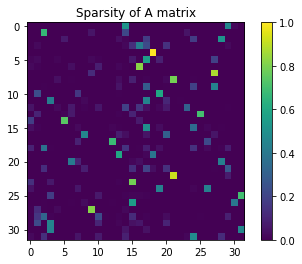

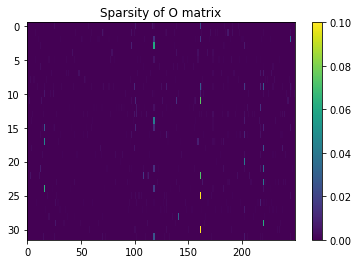

In [26]:
visualize_sparsities(adv_hmm32, O_max_cols=250)

Visualize the top 10 words in each state through wordclouds.

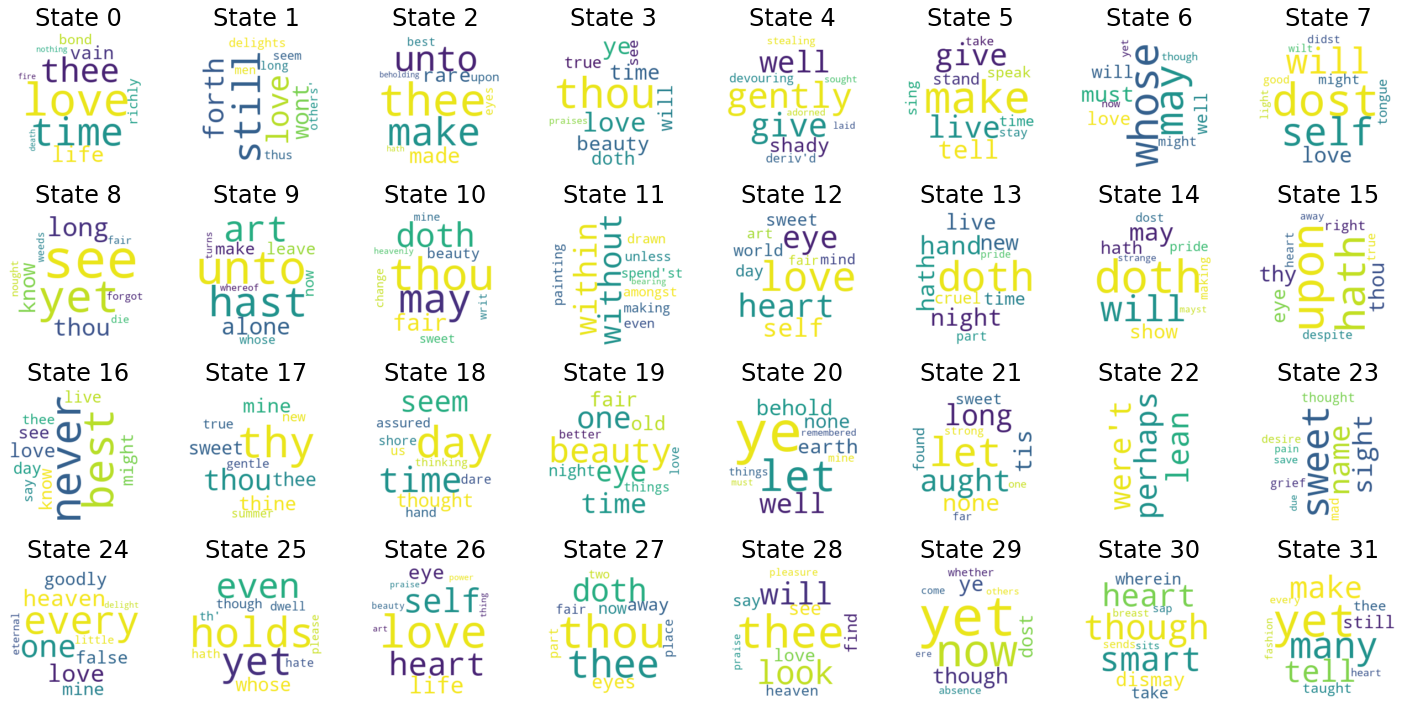

In [27]:
# get top 10 words for each state
wordclouds = states_to_wordclouds(adv_hmm32, adv_word2vec, max_words=10, show=False)

fig, axes = plt.subplots(4, 8, figsize=(20, 10))
for i in range(32):
    row = i // 8
    col = i % 8
    axes[row, col].imshow(wordclouds[i], interpolation='bilinear')
    axes[row, col].set_axis_off()
    axes[row, col].set_title('State {}'.format(i), fontsize=24)
plt.tight_layout()
plt.savefig('figures/states_wordclouds.png')
plt.show()

In [28]:
def draw_transition(hmm, obs_map_r, wordclouds, height=12, width=12):
    # Parameters.
    lim = 1200
    text_x_offset = 40
    text_y_offset = 80
    x_offset = 580
    y_offset = 520
    R = 420
    r = 100
    arrow_size = 20
    arrow_p1 = 0.03
    arrow_p2 = 0.02
    arrow_p3 = 0.06

    # Initialize.
    n_states = len(hmm.A)

    # Initialize plot.    
    fig, ax = plt.subplots()
    fig.set_figheight(height)
    fig.set_figwidth(width)
    ax.grid('off')
    plt.axis('off')
    ax.set_xlim([0, lim])
    ax.set_ylim([0, lim])

    # Plot each wordcloud.
    for i, wordcloud in enumerate(wordclouds):
        x = x_offset + int(R * np.cos(np.pi * 2 * i / n_states))
        y = y_offset + int(R * np.sin(np.pi * 2 * i / n_states))
        ax.annotate('{}'.format(i), (x, y))
        
    # Make the arrows.
    zorder_mult = n_states ** 2 * 100
    arrows = []
    for i in range(n_states):
        row = []
        for j in range(n_states):
            # Arrow coordinates.
            x_i = x_offset + R * np.cos(np.pi * 2 * i / n_states)
            y_i = y_offset + R * np.sin(np.pi * 2 * i / n_states)
            x_j = x_offset + R * np.cos(np.pi * 2 * j / n_states)
            y_j = y_offset + R * np.sin(np.pi * 2 * j / n_states)

            dx = x_j - x_i
            dy = y_j - y_i
            d = np.sqrt(dx**2 + dy**2)

            if i != j:
                arrow = ax.arrow(x_i + (r/d + arrow_p1) * dx + arrow_p2 * dy,
                                 y_i + (r/d + arrow_p1) * dy + arrow_p2 * dx,
                                 (1 - 2 * r/d - arrow_p3) * dx,
                                 (1 - 2 * r/d - arrow_p3) * dy,
                                 color=(1 - hmm.A[i][j], ) * 3,
                                 head_width=arrow_size, head_length=arrow_size,
                                 zorder=int(hmm.A[i][j] * zorder_mult))
            else:
                arrow = ax.arrow(x_i, y_i, 0, 0,
                                 color=(1 - hmm.A[i][j], ) * 3,
                                 head_width=arrow_size, head_length=arrow_size,
                                 zorder=int(hmm.A[i][j] * zorder_mult))

            row.append(arrow)
        arrows.append(row)

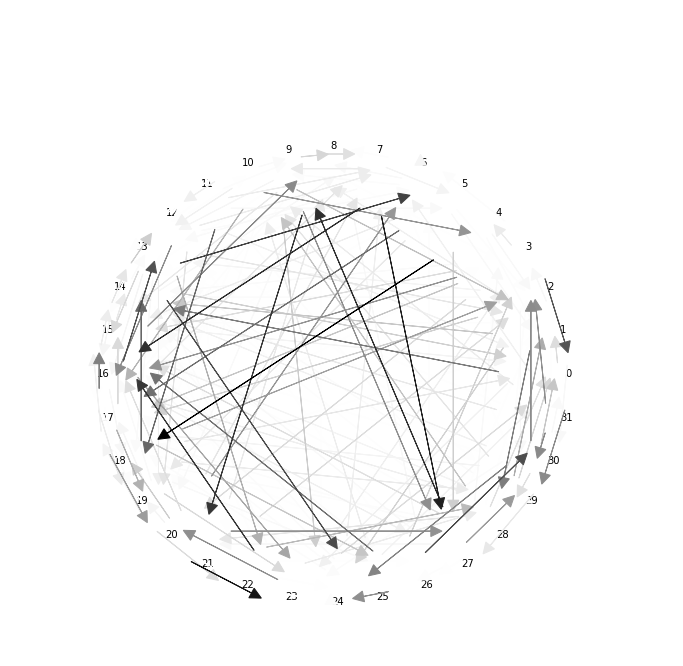

In [29]:
draw_transition(adv_hmm32, adv_vec2word, wordclouds)